Лаборатороная работа 9. 
Кластеризация

In [44]:
# Подключение библиотек и загрузка данных

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Загрузка данных
dataset = pd.read_csv('../MMO/Datasets/stars_lab9.csv')
dataset.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [45]:
X = dataset.iloc[:, [4, 0]].values
X

array([[    0,  3068],
       [    0,  3042],
       [    0,  2600],
       [    0,  2800],
       [    0,  1939],
       [    0,  2840],
       [    0,  2637],
       [    0,  2600],
       [    0,  2650],
       [    0,  2700],
       [    1,  3600],
       [    1,  3129],
       [    1,  3134],
       [    1,  3628],
       [    1,  2650],
       [    1,  3340],
       [    1,  2799],
       [    1,  3692],
       [    1,  3192],
       [    1,  3441],
       [    2, 25000],
       [    2,  7740],
       [    2,  7220],
       [    2,  8500],
       [    2, 16500],
       [    2, 12990],
       [    2,  8570],
       [    2,  7700],
       [    2, 11790],
       [    2,  7230],
       [    3, 39000],
       [    3, 30000],
       [    3, 15276],
       [    3,  9700],
       [    3,  5800],
       [    3,  8052],
       [    3,  6757],
       [    3,  6380],
       [    3,  5936],
       [    3,  5587],
       [    4,  3826],
       [    4,  3365],
       [    4,  3270],
       [   

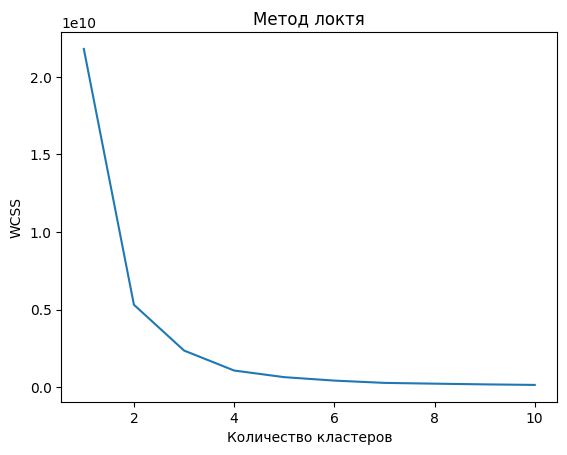

In [46]:
# Определение оптимального количества кластеров

# Использование elbow method для поиска оптимального количества кластеров
from sklearn.cluster import KMeans
# Within Clusters Sum of Squares (WCSS)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

In [47]:
# Обучение модели кластеризации для оптимального количества кластеров

# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

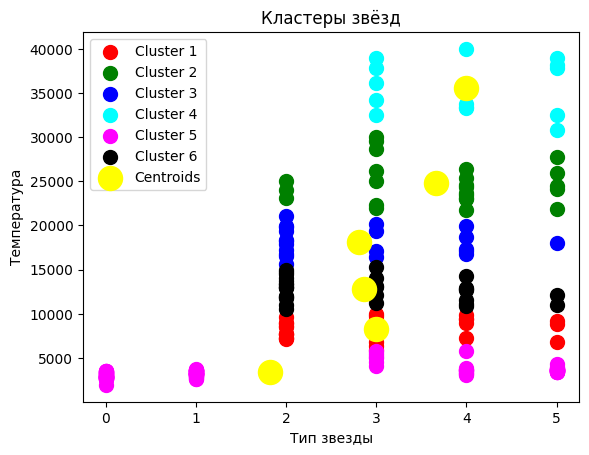

In [48]:
# Визуализация результатов

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Кластеры звёзд')
plt.xlabel('Тип звезды')
plt.ylabel('Температура')
plt.legend()
plt.show()